In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()
from sklearn.metrics.pairwise import cosine_similarity
import pickle
from difflib import SequenceMatcher,get_close_matches

In [2]:
book=pd.read_csv('DataSets/books.csv')
rating=pd.read_csv('DataSets/Ratings.csv')
user=pd.read_csv('DataSets/Users.csv')

C:\Users\91993\AppData\Local\Temp\ipykernel_4668\3837534474.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  book=pd.read_csv('DataSets/books.csv')


### 1.EDA on Book DataSet

In [3]:
book.shape

(271360, 8)

In [4]:
book.sample(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
168571,0938817329,Word of Mouth: A Guide to Commercial Voice-Ove...,Susan Blu,1992,Pomegranate Press (CA),http://images.amazon.com/images/P/0938817329.0...,http://images.amazon.com/images/P/0938817329.0...,http://images.amazon.com/images/P/0938817329.0...
20342,006091565X,The Dance of Anger: A Woman's Guide to Changin...,Harriet Lerner,1997,Quill,http://images.amazon.com/images/P/006091565X.0...,http://images.amazon.com/images/P/006091565X.0...,http://images.amazon.com/images/P/006091565X.0...
262939,0684179520,To Have and Have Not (To Have &amp; Have Not Srs),Ernest Hemingway,1983,Collier Books,http://images.amazon.com/images/P/0684179520.0...,http://images.amazon.com/images/P/0684179520.0...,http://images.amazon.com/images/P/0684179520.0...
238263,0898794439,Creating Poetry,John Drury,1991,Writer's Digest Books,http://images.amazon.com/images/P/0898794439.0...,http://images.amazon.com/images/P/0898794439.0...,http://images.amazon.com/images/P/0898794439.0...
155641,0872432335,Old Times on the Mississippi,Mark Twain,1998,Templegate Pub,http://images.amazon.com/images/P/0872432335.0...,http://images.amazon.com/images/P/0872432335.0...,http://images.amazon.com/images/P/0872432335.0...


In [5]:
book.isnull().mean()*100

ISBN                   0.000000
Book-Title             0.000000
Book-Author            0.000369
Year-Of-Publication    0.000000
Publisher              0.000737
Image-URL-S            0.000000
Image-URL-M            0.000000
Image-URL-L            0.001106
dtype: float64

#### Null value is very less even less than 0.005% , so we can safely remove it

In [6]:
book.dropna(inplace=True)

#### Is there any duplicate Row?

In [7]:
book.duplicated().sum()

0

#### Top 10 author

<AxesSubplot:xlabel='Book-Author', ylabel='count'>

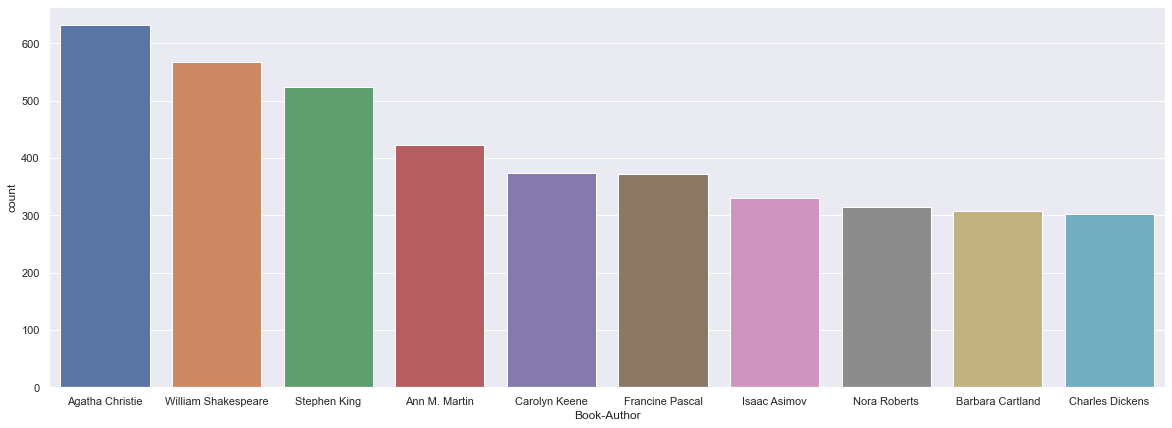

In [8]:
index_10=book['Book-Author'].value_counts()[0:10].index
plt.figure(figsize=(20,7))
sns.countplot(x=book['Book-Author'],order=index_10)

In [9]:
book['Book-Author'].describe()

count              271354
unique             102020
top       Agatha Christie
freq                  632
Name: Book-Author, dtype: object

#### Top 10 years

<AxesSubplot:xlabel='Year-Of-Publication', ylabel='count'>

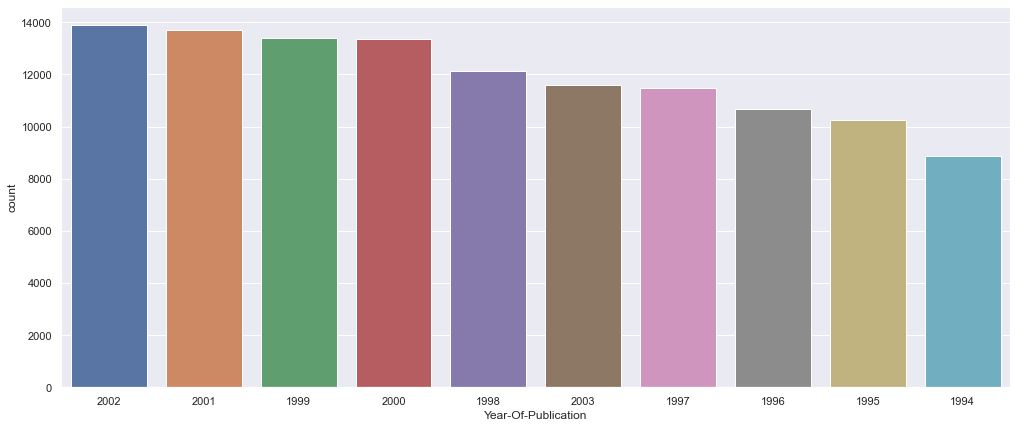

In [10]:
index_10=book['Year-Of-Publication'].value_counts().index[0:10]
plt.figure(figsize=(17,7))
sns.countplot(x=book['Year-Of-Publication'],order=index_10)

In [11]:
book['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

#### Top 10 Publisher 

<AxesSubplot:xlabel='count', ylabel='Publisher'>

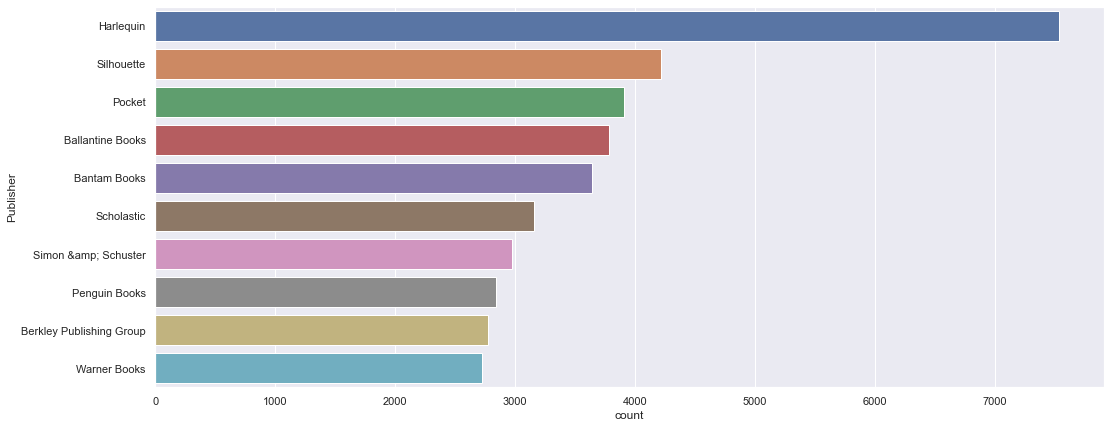

In [12]:
index_10=book['Publisher'].value_counts().index[0:10]
plt.figure(figsize=(17,7))
sns.countplot(y=book['Publisher'],order=index_10)

### 2. EDA on Rating dataset

In [13]:
rating.shape

(1149780, 3)

In [14]:
rating.sample(10)

,User-ID,ISBN,Book-Rating
856089,206979,0433397101,0
449477,107784,0446607711,0
74440,16046,044651862X,10
689976,168034,0804114986,6
452402,108352,0385334141,0
587337,141819,088730866X,0
885945,213350,0553284363,0
1058223,252695,0553560735,0
171783,37311,0060959037,9
716024,173481,0425141551,0


In [15]:
rating.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [16]:
rating.duplicated().sum() #number of duplicate rows

0

In [17]:
rating['Book-Rating'].describe()

count    1.149780e+06
mean     2.866950e+00
std      3.854184e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      7.000000e+00
max      1.000000e+01
Name: Book-Rating, dtype: float64

<AxesSubplot:xlabel='Book-Rating', ylabel='count'>

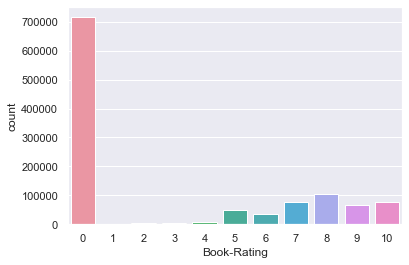

In [18]:
sns.countplot(x=rating['Book-Rating'])

### 2. EDA on User dataset

In [19]:
user.shape

(278858, 3)

In [20]:
user.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [21]:
user.isnull().mean()*100

User-ID      0.000000
Location     0.000000
Age         39.719857
dtype: float64

In [22]:
# 39% values in Age column are null , so its better to discard this column
user.drop(columns=['Age'],inplace=True)

#### Top 10 Country

<AxesSubplot:xlabel='count', ylabel='Location'>

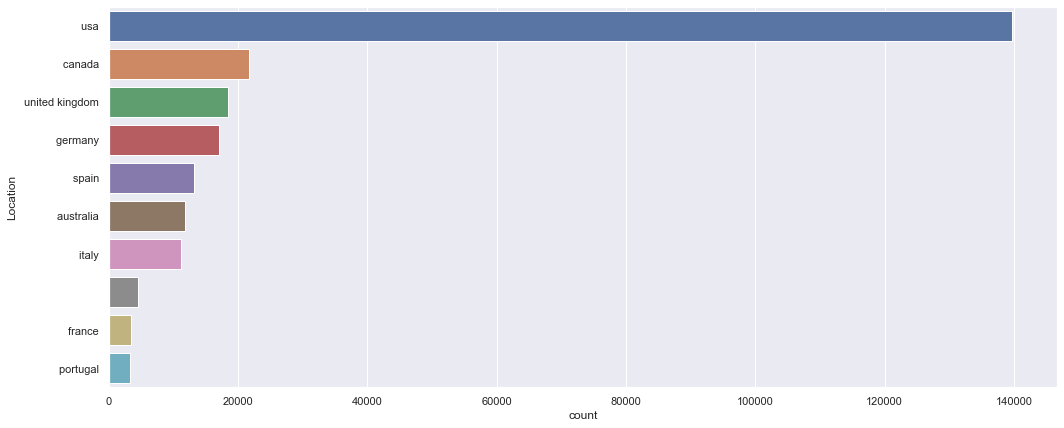

In [23]:
country=user.Location.apply(lambda x:x.split(',')[-1])
plt.figure(figsize=(17,7))
sns.countplot(y=country,order=country.value_counts(dropna=True).index[0:10])

# Popularity Based Recommendation System

The idea here is to pick top 50 rated books provided the book is rated by atleast 200 users.
I am assuming if rating is from 200 different user then its authentic.

In [24]:
#joining two tables
book_ratings=pd.merge(book,rating,on='ISBN')

In [25]:
book_ratings

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,0
...,...,...,...,...,...,...,...,...,...,...
1031124,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,276463,7
1031125,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,276579,4
1031126,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,276680,0
1031127,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,276680,0


In [26]:
# numer of user rated that particular book
user_count=book_ratings.groupby(book_ratings['Book-Title']).count()['User-ID'].reset_index() 
user_count

,Book-Title,User-ID
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241061,Ã?Â?lpiraten.,2
241062,Ã?Â?rger mit Produkt X. Roman.,4
241063,Ã?Â?sterlich leben.,1
241064,Ã?Â?stlich der Berge.,3


In [27]:
# average rating on that particular book
avg_rating=book_ratings.groupby(book_ratings['Book-Title']).mean()['Book-Rating'].reset_index()
avg_rating['Book-Rating']=round(avg_rating['Book-Rating'],1)
avg_rating

,Book-Title,Book-Rating
0,A Light in the Storm: The Civil War Diary of ...,2.2
1,Always Have Popsicles,0.0
2,Apple Magic (The Collector's series),0.0
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.0
4,Beyond IBM: Leadership Marketing and Finance ...,0.0
...,...,...
241061,Ã?Â?lpiraten.,0.0
241062,Ã?Â?rger mit Produkt X. Roman.,5.2
241063,Ã?Â?sterlich leben.,7.0
241064,Ã?Â?stlich der Berge.,2.7


In [28]:
popular50=pd.merge(user_count,avg_rating,on='Book-Title')
popular50=popular50.rename(columns={'User-ID':'Users_count','Book-Rating':'avg_rating'})

In [29]:
popular50=popular50[popular50['Users_count']>=200].sort_values(by='avg_rating',ascending=False)[0:50]
popular50=popular50.reset_index(drop=True)

In [30]:
popular50.head()

,Book-Title,Users_count,avg_rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.9
1,Harry Potter and the Goblet of Fire (Book 4),387,5.8
2,Harry Potter and the Sorcerer's Stone (Book 1),278,5.7
3,Harry Potter and the Order of the Phoenix (Boo...,347,5.5
4,Ender's Game (Ender Wiggins Saga (Paperback)),249,5.4


In [31]:
# To get image ,pulisher and book author name
popular_50=pd.merge(popular50,book,on='Book-Title')[['Book-Title','Image-URL-M','avg_rating','Users_count','Book-Author','Publisher']]

In [32]:
popular_50=popular_50.drop_duplicates('Book-Title').reset_index(drop=True)

In [33]:
popular_50

,Book-Title,Image-URL-M,avg_rating,Users_count,Book-Author,Publisher
0,Harry Potter and the Prisoner of Azkaban (Book 3),http://images.amazon.com/images/P/0439136350.0...,5.9,428,J. K. Rowling,Scholastic
1,Harry Potter and the Goblet of Fire (Book 4),http://images.amazon.com/images/P/0439139597.0...,5.8,387,J. K. Rowling,Scholastic
2,Harry Potter and the Sorcerer's Stone (Book 1),http://images.amazon.com/images/P/0590353403.0...,5.7,278,J. K. Rowling,Scholastic
3,Harry Potter and the Order of the Phoenix (Boo...,http://images.amazon.com/images/P/043935806X.0...,5.5,347,J. K. Rowling,Scholastic
4,Ender's Game (Ender Wiggins Saga (Paperback)),http://images.amazon.com/images/P/0312853238.0...,5.4,249,Orson Scott Card,Tor Books
5,Harry Potter and the Chamber of Secrets (Book 2),http://images.amazon.com/images/P/0439064872.0...,5.2,556,J. K. Rowling,Scholastic
6,The Hobbit : The Enchanting Prelude to The Lor...,http://images.amazon.com/images/P/0345339681.0...,5.0,281,J.R.R. TOLKIEN,Del Rey
7,Harry Potter and the Sorcerer's Stone (Harry P...,http://images.amazon.com/images/P/059035342X.0...,4.9,575,J. K. Rowling,Arthur A. Levine Books
8,The Fellowship of the Ring (The Lord of the Ri...,http://images.amazon.com/images/P/0345339703.0...,4.9,368,J.R.R. TOLKIEN,Del Rey
9,"The Two Towers (The Lord of the Rings, Part 2)",http://images.amazon.com/images/P/0345339711.0...,4.9,260,J.R.R. TOLKIEN,Del Rey


In [34]:
popular_50.shape

(50, 6)

## Collaborative Filtering Based Recommendation System

In [35]:
book_ratings.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,0


In [36]:
#to find users who rated more than 200 book


In [37]:
x=book_ratings.groupby('User-ID').count()['Book-Title']
considarable_users=x[x>200].index
considarable_users

Int64Index([   254,   2276,   2766,   2977,   3363,   4017,   4385,   6251,
              6323,   6543,
            ...
            271705, 273979, 274004, 274061, 274301, 274308, 275970, 277427,
            277639, 278418],
           dtype='int64', name='User-ID', length=811)

In [38]:
considarable_users.shape

(811,)

In [39]:
filtered_user=book_ratings[book_ratings['User-ID'].apply(lambda x: x in considarable_users)]
filtered_user.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
6,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,85526,0
7,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,96054,0
10,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,177458,0
21,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,110912,10


In [40]:
filtered_user.shape

(474003, 10)

In [41]:
#All book which is rated by more than 50 user
x=filtered_user.groupby('Book-Title').count()['User-ID']
considerable_book=x[x>=50].index

In [42]:
considerable_book.shape

(706,)

In [43]:
filtered_user.shape

(474003, 10)

In [44]:
filtered_data=filtered_user[filtered_user['Book-Title'].apply(lambda x: x in considerable_book)]

In [45]:
filtered_data.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
31,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,11676,9
33,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,36836,0
34,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,46398,9
38,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,113270,0
39,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,113519,0


In [46]:
filtered_data.shape

(58586, 10)

In [47]:
pivot_data=filtered_data.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [48]:
pivot_data

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Bend in the Road,0.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,9.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [49]:
pivot_data=pivot_data.fillna(0)

In [50]:
pivot_data

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
similarity_score=cosine_similarity(pivot_data)

In [52]:
def Recommend_Book(Book_name):
    Book_name=get_close_matches(Book_name,pivot_data.index,n=1,cutoff=0)[0]
    print(Book_name)
    try:
        ind=np.where(pivot_data.index==Book_name)[0][0]
    except:
        print('Book is not in Data Base')
    else:
        distances=sorted(list(enumerate(similarity_score[ind])),key=lambda x:x[1],reverse=True)
        
        
        recommendation=pd.DataFrame(columns=['Book-Title','Book-Author','Image-URL-M'])
        
        book_names=pivot_data.index
        
        for i in distances[1:6]:
            tem=book[book['Book-Title']==book_names[i[0]]][['Book-Title','Book-Author','Image-URL-M']]
            
            recommendation=pd.concat([recommendation,tem])
        
        recommendation.drop_duplicates(['Book-Title'],inplace=True)
        recommendation=recommendation.reset_index(drop=True)
        return recommendation

    

In [53]:
Recommend_Book('Half girlfriend')

Circle of Friends


,Book-Title,Book-Author,Image-URL-M
0,The Glass Lake,Maeve Binchy,http://images.amazon.com/images/P/0440221595.0...
1,GARDEN OF SHADOWS (Dollanger Saga (Paperback)),Ariel Jennifer Jones,http://images.amazon.com/images/P/067164257X.0...
2,Nights in Rodanthe,Nicholas Sparks,http://images.amazon.com/images/P/0446531332.0...
3,Granny Dan,DANIELLE STEEL,http://images.amazon.com/images/P/0440224829.0...
4,Dark Angel,V.C. Andrews,http://images.amazon.com/images/P/0671525433.0...


In [54]:
with open(r'D:\cp\Code\Projects\BookRecommender\pickle_files\popular_50.pkl','wb') as f:
    pickle.dump(popular_50,f)
    
with open(r'D:\cp\Code\Projects\BookRecommender\pickle_files\book.pkl','wb') as f:
    pickle.dump(book,f)
    
with open(r'D:\cp\Code\Projects\BookRecommender\pickle_files\pivot_data.pkl','wb') as f:
    pickle.dump(pivot_data,f)
    
with open(r'D:\cp\Code\Projects\BookRecommender\pickle_files\similarity_score.pkl','wb') as f:
    pickle.dump(similarity_score,f)
    